In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn.datasets import dump_svmlight_file
from svm import *
from svmutil import *

In [2]:
#Loading the data

trainInput = np.loadtxt("trainInputBinary.csv")
trainTarget = np.loadtxt("trainTargetBinary.csv")
testInput = np.loadtxt("testInputBinary.csv")
testTarget = np.loadtxt("testTargetBinary.csv")

In [3]:
print('Train set shape: ', trainInput.shape); print('Train labels size: ', trainTarget.shape)
print('Test set shape: ', testInput.shape); print('Test labels size: ', testTarget.shape)

Train set shape:  (297, 186)
Train labels size:  (297,)
Test set shape:  (231, 186)
Test labels size:  (231,)


In [4]:
# Gaussian kernel: exp(−γ|x−z|2)

from statistics import median

x = trainInput
y = trainTarget

def distance(x,y):   
    return np.sqrt(np.sum((x-y)**2))

# Jaakkola’s heuristic to estimate a good value for alpha, consider for every training sample 
def jaakkola(x,y):
    distances = []
    dist_min = 1
    for i in range(x.shape[0]):
        for j in range(x.shape[0]):
            if y[i] != y[j]:
                dist = distance(x[i,:], x[j,:])
                if dist < dist_min:
                    dist_min = dist
        distances.append(dist_min)
    
    return median(distances), distances

alpha, d = jaakkola(x, y)

In [5]:
alpha

0.1110425510347691

In [6]:
# Converting the data to libsvm format
dump_svmlight_file(trainInput, trainTarget,'train.dat', zero_based=False, multilabel=False)
dump_svmlight_file(testInput, testTarget,'test.dat')

In [7]:
# Binary classiﬁcation using support vector machines and Libsvm library

y, x = svm_read_problem('train.dat')

c = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]; g = round(alpha, 3)
prob  = svm_problem(y, x)
param = svm_parameter()
best = 1
err = []

# Grid-search to determine the SVM hyperparameters γ and C. 
for i in range(len(c)):
    param.C = c[i]; param.G = g; 
    model = svm_train(prob, param, '-v 5')
    p_label, p_acc, p_val = svm_predict(y, x, model)
    err.append(p_acc[1])
    mse = p_acc[1]
    if (mse < best):
        bestc = c[i]; bestg = g; min_err = round(best, 3) ; best = round(mse, 3) ; acc=p_acc[0]

print('C:', bestc, ', gamma:', bestg, ', MSE:', min_err, ', Accuracy:', acc)

Accuracy = 84.1751% (250/297) (classification)
Accuracy = 84.1751% (250/297) (classification)
Accuracy = 84.1751% (250/297) (classification)
Accuracy = 84.1751% (250/297) (classification)
Accuracy = 84.1751% (250/297) (classification)
Accuracy = 90.9091% (270/297) (classification)
Accuracy = 98.3165% (292/297) (classification)
Accuracy = 99.6633% (296/297) (classification)
C: 10000 , gamma: 0.111 , MSE: 0.017 , Accuracy: 99.66329966329967


In [8]:
def run(y, x, model):
    p_label, p_acc, p_val = svm_predict(y, x, model)
    return p_label, p_acc, p_val

In [9]:
# Training with best pair C & gamma found

y_train, x_train = svm_read_problem('train.dat')
pb = svm_problem(y_train, x_train)
param = svm_parameter()
param.C=bestc; param.G=bestg
m = svm_train(pb, param)

labels, acc, vals = run(y_train, x_train, m)
print("MSE Train: ", round(acc[1], 3))

Accuracy = 99.6633% (296/297) (classification)
MSE Train:  0.003


In [10]:
# Model in Test

y_test, x_test = svm_read_problem('test.dat')
lab, ac, val= run(y_test, x_test, m)
print("MSE test: ", round(ac[1], 3))

Accuracy = 86.5801% (200/231) (classification)
MSE test:  0.134


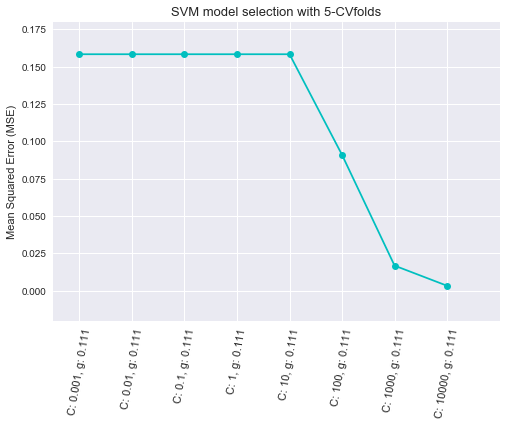

In [11]:
labels = ['C: ' + str(c[i]) + ', ' + 'g: ' + str(g) for i in range(len(c))]
x = list(range(1,len(c)+1))

style.use('seaborn')
plt.xticks(x, labels, rotation=80, fontsize=11)
plt.ylabel("Mean Squared Error (MSE)", fontsize=11)
plt.plot(x, err, c='c', marker='o')
plt.title('SVM model selection with 5-CVfolds', fontsize=13)
plt.xlim([0.5, 9])
plt.ylim([-0.02, 0.18])
plt.show();